In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

In [2]:
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pd.read_csv("D:/DataScience_DataSets/13. KNN/pima-indians-diabetes.data.csv", names = names)
array = dataframe.values
x = array[:,0:8]
y = array[:,8]

In [3]:
kfold = KFold(n_splits=10)

In [4]:
model = KNeighborsClassifier(n_neighbors=15)
result = cross_val_score(model, x, y, cv = kfold)
result

array([0.72727273, 0.80519481, 0.68831169, 0.5974026 , 0.76623377,
       0.79220779, 0.77922078, 0.84415584, 0.73684211, 0.73684211])

In [5]:
result.mean()

0.7473684210526315

### Grid Search for Algorithm Tuning

In [6]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [7]:
model = KNeighborsClassifier()
gsv = GridSearchCV(estimator=model, param_grid=param_grid)
gsv.fit(x,y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [8]:
gsv.best_params_, gsv.best_score_

({'n_neighbors': 14}, 0.7578558696205755)

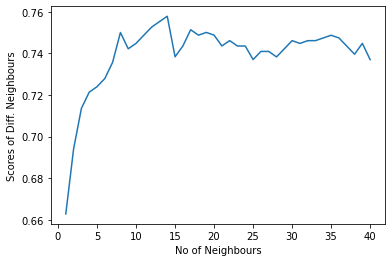

In [9]:
import matplotlib.pyplot as plt
k_range = range(1,41)
k_scores = []
for i in k_range:
    model = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(model, x, y , cv = 5)
    k_scores.append(score.mean())
plt.plot(k_range, k_scores)
plt.xlabel("No of Neighbours")
plt.ylabel("Scores of Diff. Neighbours")
plt.show()

In [10]:
model = KNeighborsClassifier(n_neighbors=14)
result = cross_val_score(model, x, y, cv = kfold)
result.mean()

0.7564764183185235